#Mfolozi Dlamini
#BSAN 6070 CA05 Logistic Regression

04 April 2022

#1. Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from matplotlib.pyplot import figure
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#2. Reading in the dataset

In [2]:
url = 'https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv'
data = pd.read_csv(url)
data.head(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


#3. Exploratory Data Analysis

In [3]:
display(data.describe())
display(data.info())
display(data.isnull().sum())

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


None

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

#4. Data Pre-processing

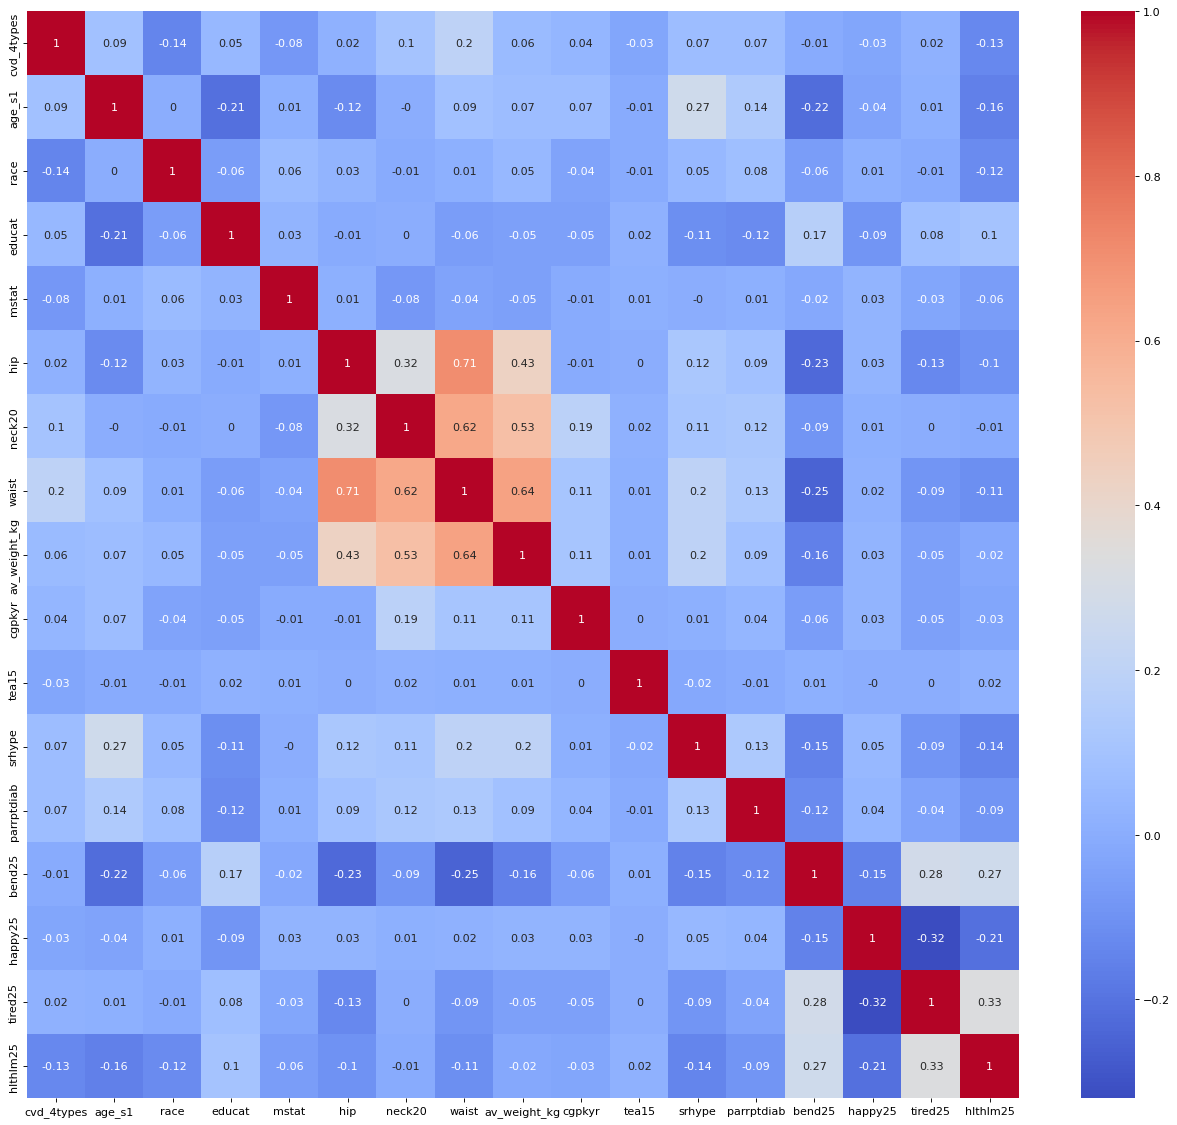

In [4]:
#Check for multicolinearity using a heatmap
figure(figsize=(20,18),dpi=80)
sns.heatmap(pd.DataFrame(data.corr(method="pearson").round(2)), annot=True, cmap='coolwarm',fmt='g')

In [5]:
#using a threshold correlation measure of 0.7 we determine that "hip" must be dropped because it is highly correlated with "waist"
data = data.drop(['hip'],axis=1)

In [6]:
#now recheck our data to make sure 'hip' feature has been removed 
data.head()

,cvd_4types,age_s1,race,educat,mstat,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


1    1913
0    1329
Name: cvd_4types, dtype: int64

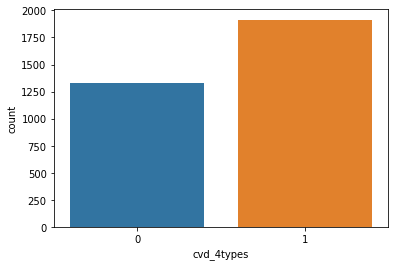

In [7]:
#check for unique values in CVD risk
display(data['cvd_4types'].value_counts())

cvd_4types_plot =sns.countplot(x="cvd_4types", data=data)

#5. Model Building
##5a. Part I: Binary Classifier Model

###Model 1: Initial Model including all the features

In [8]:
#first we select the features and then split the dataset in to features(X) and target variable(y)
feature_cols = ['age_s1','race','educat','mstat','neck20', 'waist','av_weight_kg','cgpkyr','tea15','srhype','parrptdiab','bend25','happy25','tired25','hlthlm25']
X= data[feature_cols]
y = data['cvd_4types']


#split X and y into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

#Fit and train the Logistic Regression classifier
clf1 = linear_model.LogisticRegression(C=1e40, solver='newton-cg',verbose=1)
fitted_model1 = clf1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [9]:
#run prediction result for model 1
pred_result = clf1.predict(X_test)
pred_result

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [10]:
#Evaluate the model performance using a confusion matrix
confus_matrix  = metrics.confusion_matrix(y_test, pred_result)
confus_matrix 

array([[162, 189],
       [ 62, 398]])

Text(0.5, 257.44, 'Predicted')

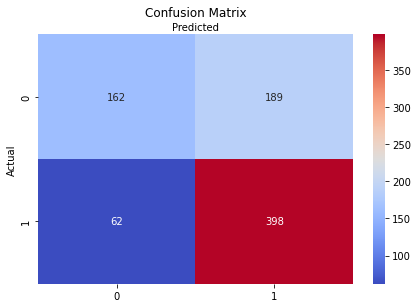

In [11]:
#Visualization of the confusion matrix using a heatmap
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confus_matrix), annot=True, cmap='coolwarm',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [12]:
#run prediction result for model 1
pred_result = clf1.predict(X_test)
pred_result

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [13]:
#Other Performance measures for Model 1
# Model Accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, pred_result))
# Model Precision
print("Precision:" ,metrics.precision_score(y_test, pred_result))
# Model Recall
print("Recall:" ,metrics.recall_score(y_test, pred_result))

Accuracy: 0.6905055487053021
Precision: 0.6780238500851788
Recall: 0.8652173913043478


###Model 2: Logistic Regression Model using regularization of penalty

In [14]:
#creating a new LR model and fitting
clf2 = linear_model.LogisticRegression(C=1e40, solver='newton-cg',penalty='l2',verbose=1)
fitted_model2 = clf2.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [15]:
#run prediction result for model 2
pred_result2 = clf2.predict(X_test)
pred_result2

#Other Performance measures for Model 2
# Model Accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, pred_result2))
# Model Precision
print("Precision:" ,metrics.precision_score(y_test, pred_result2))
# Model Recall
print("Recall:" ,metrics.recall_score(y_test, pred_result2))


Accuracy: 0.6905055487053021
Precision: 0.6780238500851788
Recall: 0.8652173913043478


###Model 3: Creating a new LR model by adjsuting C values

In [16]:
#Logistic regression model
lr_model =linear_model.LogisticRegression()

#Set the C values to be across a random distribution
c_val = uniform(loc=0,scale=4)

#tune the hyperparameter by regularization of the penalty
penalty = ['l1', 'l2']

#Generate a dictionary of the hyperparameters to be tuned
hypam = dict(C=c_val,penalty=penalty)

#Allow the model to be fit using a randomized search
clf3 = RandomizedSearchCV(lr_model, hypam, random_state=1, n_iter=100,cv=5,verbose=0,n_jobs=-1)

In [17]:
#fit the model defined above
best_model = clf3.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [18]:
#Finding and displaying the best hyperparameter and C values
# Find the optimum Hyperparameter and C value 
print("Best hyper-parameter is:", best_model.best_estimator_.get_params()["penalty"])
print("Best C-value is:", best_model.best_estimator_.get_params()["C"])

Best hyper-parameter is: l2
Best C-value is: 3.00057725977987


##5b Part II: Displaying the Feature importance in order of decreasing influence on CVD Risk

In [20]:
#Fit the model using the optimal values found above
final_model = linear_model.LogisticRegression(random_state=1, penalty='l2', C =3.00057725977987 , solver='newton-cg')
final_model.fit(X_train/np.std(X_train, 0), y_train)

#Multiply the coefficients by standard deviation and sort by feature of importance descending
importance = (np.std(X_train, 0)*final_model.coef_[0])
importance.sort_values(ascending = False)

waist           8.321497
age_s1          1.196947
cgpkyr          0.862583
tired25         0.135976
educat          0.134307
bend25          0.058134
parrptdiab      0.031042
srhype          0.028436
tea15          -0.044918
happy25        -0.077017
race           -0.104871
mstat          -0.130382
hlthlm25       -0.231552
neck20         -0.327683
av_weight_kg   -1.549361
dtype: float64

In [21]:
pred_result3 = best_model.predict(X_test)
#Other Performance measures for Model 2
# Model Accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, pred_result3))
# Model Precision
print("Precision:" ,metrics.precision_score(y_test, pred_result3))
# Model Recall
print("Recall:" ,metrics.recall_score(y_test, pred_result3))

Accuracy: 0.6843403205918619
Precision: 0.6722972972972973
Recall: 0.8652173913043478


##5c  Part III: Evaluate the performance of your model (including ROC Curve)

In [24]:
#classification report
print(metrics.classification_report(y_test, pred_result3))

              precision    recall  f1-score   support

           0       0.72      0.45      0.55       351
           1       0.67      0.87      0.76       460

    accuracy                           0.68       811
   macro avg       0.69      0.66      0.65       811
weighted avg       0.69      0.68      0.67       811



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

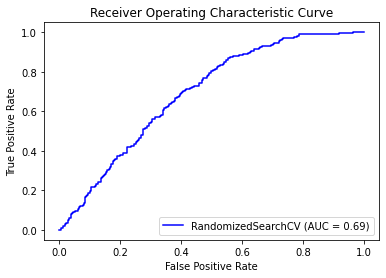

In [25]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
#ROC curve 
plot_roc_curve(best_model,X_test, y_test,color="blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")